In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import seaborn as sns
import pickle, gzip
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.cluster import KMeans
import sys
from sklearn.ensemble import RandomForestClassifier as rfc

In [230]:
def get_data_python2():
    with gzip.open('mnist.pkl.gz', 'rb') as fd:
        #u = pickle._Unpickler(fd)
        #u.encoding = 'latin1'
        train_set, valid_set, test_set = pickle.load(fd)
        #u.load()
        return train_set, valid_set, test_set

In [231]:
def get_data_python3():
    with gzip.open('mnist.pkl.gz', 'rb') as fd:
        u = pickle._Unpickler(fd)
        u.encoding = 'latin1'
        train_set, valid_set, test_set = u.load()
        return train_set, valid_set, test_set

In [232]:
if(sys.version[0]=='3'):
    train_set, valid_set, test_set = get_data_python3()
elif(sys.version[0]=='2'):
    train_set, valid_set, test_set = get_data_python2()

In [233]:
# combine train and val
train_set = (np.concatenate([train_set[0], valid_set[0]], axis=0), 
                np.concatenate([train_set[1], valid_set[1]], axis=0))

In [234]:
print("Size of training set:", len(train_set[0]))

('Size of training set:', 60000)


In [235]:
print("Size of each training set item (28x28 image 1-d array): ", len(train_set[0][0]))

('Size of each training set item (28x28 image 1-d array): ', 784)


In [236]:
#Reshaping each 784 1-d array into 28x28 2-d array
train_set[0].reshape(60000,28,28).shape

(60000, 28, 28)

In [237]:
#Creating 4x4 grid of 10x10 patches
def patch_creation(image):
    patches = []
    x=[0,6,12,18]
    y=[0,6,12,18]
    for i in x:
        for j in y:
            patch = image[i:i+10,j:j+10].reshape(-1,100)
            patches.append(patch)
    return(patches)

In [238]:
def plot_image(test): 
    fig = plt.figure(figsize=(4., 4.))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )

    for ax, im in zip(grid, [test[0].reshape(10, 10), test[1].reshape(10, 10), test[2].reshape(10, 10), test[3].reshape(10, 10),
                            test[4].reshape(10, 10), test[5].reshape(10, 10), test[6].reshape(10, 10), test[7].reshape(10, 10),
                            test[8].reshape(10, 10), test[9].reshape(10, 10),test[10].reshape(10, 10),test[11].reshape(10, 10),
                            test[12].reshape(10, 10), test[13].reshape(10, 10),test[14].reshape(10, 10),test[15].reshape(10, 10)]):
        # Iterating over the grid returns the Axes.
        ax.imshow(im, cmap='Greys_r')

    plt.show()

In [239]:
#this function is simply here to make sure that our grid creation works correctly
def test_image():
    #fetch one image
    image = train_set[0][1].reshape(28,28)
    
    print("Image shape: ",image.shape)
    
    #create 16 - 10x10 patches
    test = patch_creation(image)
    
    print("Num patches: ", len(test))
    
    #plotting the test image to see create patches
    plot_image(test)
    
    #plt.imshow(image.reshape(28, 28), cmap='Greys_r')
    

('Image shape: ', (28, 28))
('Num patches: ', 16)


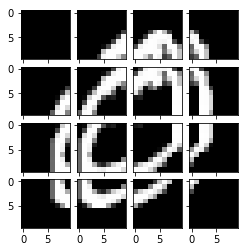

In [240]:
test_image()

In [241]:
#reshaping each 784 1-d array into 28x28 2-d array and creating patches for each image
training_patches=[]
for i in range(60000):
    image = train_set[0][i].reshape(28,28)
    training_patches.append(patch_creation(image))

In [242]:
print("Amount of training images: ", len(training_patches))

('Amount of training images: ', 60000)


In [243]:
print("Amount of matrices (patches) in each training image: ", len(training_patches[0]))

('Amount of matrices (patches) in each training image: ', 16)


In [244]:
#Choosing 1 patch from the 16 previously created for each image at random and appending to 
#training list
train_cluster=[]
for i in range(60000):
    n = random.randint(0, 15)
    train_cluster.append(training_patches[i][n])

In [245]:
#creates a list of 6000 numbers where each is between 0 - 59999
indices = random.sample(range(60000), 6000)

In [246]:
#appending randomly sampled patches using the previously created list of indices
train_cluster_sample=[]
for ind in indices:
    train_cluster_sample.append(train_cluster[ind])

In [247]:
print("Length of our randomly sampled patches: ", len(train_cluster_sample))

('Length of our randomly sampled patches: ', 6000)


In [248]:
#creating a 6000x100 matrix of zeros that where each row will be one of our samples
training_matrix = np.zeros((6000,100))
for i in range(6000):
    #making eacch row a random patch
    training_matrix[i,:] = train_cluster_sample[i][0]

In [249]:
# create kmeans object
kmeans = KMeans(n_clusters=50)
# fit kmeans object to data
kmeans.fit(training_matrix)
# save new clusters for chart
y_km = kmeans.predict(training_matrix)

In [250]:
training_matrix_60k = np.zeros((60000,100))
for i in range(60000):
    training_matrix_60k[i,:] = train_cluster[i][0]

In [251]:
y_km_60k = kmeans.predict(training_matrix_60k)

In [252]:
#cluster_dict=[]
cluster_dict = {}
for i in range(50):
    key = str(i)
    subtrain_matrix = training_matrix_60k[y_km_60k==i,:]
    kmeans_sub = KMeans(n_clusters=50)
    kmeans_sub.fit(subtrain_matrix)
    cluster_dict[key] = kmeans_sub 
    y_km_sub = kmeans_sub.predict(subtrain_matrix)
    #cluster_dict.append(y_km_sub)

In [253]:
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 0)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

In [254]:
def patch_b(image):
    patches16 = []
    x_ = [0, 1, 2]
    y_ = [0, 1, 2]
    x=[0,6,12,18]
    y=[0,6,12,18]
    for i in x:
        for j in y:
            patches9 = []
            for k in x_:
                for l in y_:
                    patch = image[i+k:i+k+10, j+l:j+l+10].reshape(-1,100)
                    patches9.append(patch)
            patches16.append(patches9)
    return patches16

In [255]:
testing_patches = []
testing_labels = []
for i in range(10000):
    testing_reshaped = test_set[0][i].reshape(28,28)
    testing_labels.append(test_set[1][i])
    testing_padded = np.pad(testing_reshaped, 1, pad_with)
    testing_patched = patch_b(testing_padded)
    testing_patches.append(testing_patched)

In [256]:
print("Shape of padded image: ", testing_padded.shape)
print("Number of original patches: ", len(testing_patched))
print("Number of recentered patches per original patch: ", len(testing_patched[0]))
print("Total number of patches for each image: ", len(testing_patched) * len(testing_patched[0]))

('Shape of padded image: ', (30, 30))
('Number of original patches: ', 16)
('Number of recentered patches per original patch: ', 9)
('Total number of patches for each image: ', 144)


In [257]:
training_patches = []
random_indices = random.sample(range(60000), 6000)
training_labels = []
for i in random_indices:
    training_reshaped = train_set[0][i].reshape(28,28)
    training_labels.append(train_set[1][i])
    training_padded = np.pad(training_reshaped, 1, pad_with)
    training_patched = patch_b(training_padded)
    training_patches.append(training_patched)

In [258]:
print("Shape of padded image: ", training_padded.shape)
print("Number of original patches: ", len(training_patched))
print("Number of recentered patches per original patch: ", len(training_patched[0]))
print("Total number of patches for each image: ", len(training_patched) * len(training_patched[0]))

('Shape of padded image: ', (30, 30))
('Number of original patches: ', 16)
('Number of recentered patches per original patch: ', 9)
('Total number of patches for each image: ', 144)


In [259]:
def finding_cluster(data,num_images=10000,num_grids=16,num_patches=9):
    data_matrix_long = np.zeros((num_images*num_grids*num_patches,100))
    z=0
    for i in range(num_images):
        for j in range(num_grids):
            for k in range(num_patches):
                data_matrix_long[z,:] = data[i][j][k]
                z=z+1
    #Finding the main 50 clusters
    data_km_long = kmeans.predict(data_matrix_long)
    data_50clusters= np.zeros((num_images,num_grids,num_patches))
    z=0
    for i in range(num_images):
        for j in range(num_grids):
            for k in range(num_patches):
                data_50clusters[i,j,k] = data_km_long[z]
                z=z+1
    data_2500clusters= [[['000_000' for i in range(num_patches)] for j in range(num_grids)] for k in range(num_images)]
    subcluster_data_fit = np.zeros((1,100))
    z=1
    #Finding the subclusters of each patch
    for i in range(num_images):
        for j in range(num_grids):
            for k in range(num_patches):
                cluster = data_50clusters[i,j,k]
                subcluster_data_fit[0,:] = data[i][j][k]
                fitted_centre=cluster_dict[str(int(cluster))].predict(subcluster_data_fit)
                text=str(int(cluster))+'_'+str(fitted_centre[0])
                data_2500clusters[i][j][k]= text
                if z%10000==0 and z>=10000:
                    print(str(z*100/(num_images*num_grids*num_patches))+'% done')
                z=z+1
    return(data_2500clusters)

In [260]:
test_2500clusters = finding_cluster(testing_patches,10000,16,9)

0% done
1% done
2% done
2% done
3% done
4% done
4% done
5% done
6% done
6% done
7% done
8% done
9% done
9% done
10% done
11% done
11% done
12% done
13% done
13% done
14% done
15% done
15% done
16% done
17% done
18% done
18% done
19% done
20% done
20% done
21% done
22% done
22% done
23% done
24% done
25% done
25% done
26% done
27% done
27% done
28% done
29% done
29% done
30% done
31% done
31% done
32% done
33% done
34% done
34% done
35% done
36% done
36% done
37% done
38% done
38% done
39% done
40% done
40% done
41% done
42% done
43% done
43% done
44% done
45% done
45% done
46% done
47% done
47% done
48% done
49% done
50% done
50% done
51% done
52% done
52% done
53% done
54% done
54% done
55% done
56% done
56% done
57% done
58% done
59% done
59% done
60% done
61% done
61% done
62% done
63% done
63% done
64% done
65% done
65% done
66% done
67% done
68% done
68% done
69% done
70% done
70% done
71% done
72% done
72% done
73% done
74% done
75% done
75% done
76% done
77% done
77% done
78% do

In [261]:
np.unique(test_2500clusters)

array(['0_0', '0_1', '0_10', ..., '9_7', '9_8', '9_9'], dtype='|S5')

In [262]:
def histogram_patch_creation(data,num_images=10000,num_grids=16,num_patches=9):
    colnames=['image_num']
    for i in range(50):
        for j in range(50):
            colnames.append(str(i)+'_'+str(j))
    df=np.zeros((num_images,2501))
    hist_patches = pd.DataFrame(df,columns = colnames)
    hist_patches['image_num']=range(num_images)
    z=1
    for i in range(num_images):
        for j in range(16):
            for k in range(9):
                hist_patches.loc[i,data[i][j][k]]+=1
                if z%10000==0 and z>=10000:
                    print(str(z*100/(num_images*num_grids*num_patches))+'% done')
                z=z+1
    return(hist_patches)

In [263]:
test_hist_patches=histogram_patch_creation(test_2500clusters,10000,16,9)

0% done
1% done
2% done
2% done
3% done
4% done
4% done
5% done
6% done
6% done
7% done
8% done
9% done
9% done
10% done
11% done
11% done
12% done
13% done
13% done
14% done
15% done
15% done
16% done
17% done
18% done
18% done
19% done
20% done
20% done
21% done
22% done
22% done
23% done
24% done
25% done
25% done
26% done
27% done
27% done
28% done
29% done
29% done
30% done
31% done
31% done
32% done
33% done
34% done
34% done
35% done
36% done
36% done
37% done
38% done
38% done
39% done
40% done
40% done
41% done
42% done
43% done
43% done
44% done
45% done
45% done
46% done
47% done
47% done
48% done
49% done
50% done
50% done
51% done
52% done
52% done
53% done
54% done
54% done
55% done
56% done
56% done
57% done
58% done
59% done
59% done
60% done
61% done
61% done
62% done
63% done
63% done
64% done
65% done
65% done
66% done
67% done
68% done
68% done
69% done
70% done
70% done
71% done
72% done
72% done
73% done
74% done
75% done
75% done
76% done
77% done
77% done
78% do

In [264]:
train_2500clusters = finding_cluster(training_patches, 6000, 16, 9)

1% done
2% done
3% done
4% done
5% done
6% done
8% done
9% done
10% done
11% done
12% done
13% done
15% done
16% done
17% done
18% done
19% done
20% done
21% done
23% done
24% done
25% done
26% done
27% done
28% done
30% done
31% done
32% done
33% done
34% done
35% done
37% done
38% done
39% done
40% done
41% done
42% done
43% done
45% done
46% done
47% done
48% done
49% done
50% done
52% done
53% done
54% done
55% done
56% done
57% done
59% done
60% done
61% done
62% done
63% done
64% done
65% done
67% done
68% done
69% done
70% done
71% done
72% done
74% done
75% done
76% done
77% done
78% done
79% done
81% done
82% done
83% done
84% done
85% done
86% done
87% done
89% done
90% done
91% done
92% done
93% done
94% done
96% done
97% done
98% done
99% done


In [265]:
train_hist_patches=histogram_patch_creation(train_2500clusters,6000,16,9)

1% done
2% done
3% done
4% done
5% done
6% done
8% done
9% done
10% done
11% done
12% done
13% done
15% done
16% done
17% done
18% done
19% done
20% done
21% done
23% done
24% done
25% done
26% done
27% done
28% done
30% done
31% done
32% done
33% done
34% done
35% done
37% done
38% done
39% done
40% done
41% done
42% done
43% done
45% done
46% done
47% done
48% done
49% done
50% done
52% done
53% done
54% done
55% done
56% done
57% done
59% done
60% done
61% done
62% done
63% done
64% done
65% done
67% done
68% done
69% done
70% done
71% done
72% done
74% done
75% done
76% done
77% done
78% done
79% done
81% done
82% done
83% done
84% done
85% done
86% done
87% done
89% done
90% done
91% done
92% done
93% done
94% done
96% done
97% done
98% done
99% done


In [266]:
def decision_tree(num_trees, depth, train_, test_, train_labels_):
    model = rfc(n_estimators=num_trees, max_depth=depth)
    model.fit(train_, train_labels_)
    train_res = model.predict(train_)
    test_res = model.predict(test_)
    return train_res, test_res

In [267]:
def cal_accuracy(predictions, target):
    correct = 0
    for pred, actual in zip(predictions, target):
        if pred == actual:
            correct += 1
    return correct / len(predictions)

In [269]:
train_res, test_res = decision_tree(20, 16, train_hist_patches, test_hist_patches, training_labels)
print("accuracy training: ", cal_accuracy(train_res, training_labels))
print("accuracy testing: ", cal_accuracy(test_res, testing_labels))

('accuracy training: ', 0)
('accuracy testing: ', 0)


In [270]:
train_res

array([7, 3, 3, ..., 7, 9, 7])

In [271]:
test_res

array([7, 2, 1, ..., 4, 5, 6])

In [294]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators=100, oob_score=True).fit(train_hist_patches,training_labels)
test_y_pred = rf.predict(test_hist_patches)
train_y_pred = rf.predict(train_hist_patches)

In [295]:
accuracy_score(testing_labels,test_y_pred)*100

89.79

In [293]:
accuracy_score(training_labels,train_y_pred)*100

100.0